# F. Биометрия
Ограничение времени	2 секунды
Ограничение памяти	122Mb
Ввод	стандартный 
Вывод	стандартный вывод или answers.tsv
В данной задаче нужно по звуковым файлам в формате wav предсказать пол человека, речь которого записана на каждом из файлов (0 – мужчина, 1 – женщина).

Для того, чтобы получить OK по этой задаче, нужно получить точность более 98 процентов на тестовом наборе данных.
Тренировочный набор данных: https://yadi.sk/d/IUUTPJFOfwn_OQ. В тренировочном наборе данных есть файл targets.tsv, в котором находятся правильные значения пола для всех записей в тренировочном наборе данных.
Тестовый набор данных: https://yadi.sk/d/K8Z-_gQbspmxkhw. В систему нужно отправить файл аналогичный targets.tsv из тренировочного набора. То есть для каждого файла id.wav в тестовом наборе данных в файле ответа должна быть строка вида

id\tgender

Примечания
Обратите внимание, что в данной задаче нужно прислать не код, а файл с результатом.
Для того, чтобы из звуковых файлов получить признаки, можно воспользоваться функцией https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html, которая для звукового файла вычислит его спектрограмму, то есть матрицу размера число признаков (задаётся параметром n_mels) на длину записи.
Если получен WA, чтобы узнать причину, можно посмотреть отчёт по посылке и увидеть его в выводе постпроцессора. Причиной такого вердикта может быть как неправильный формат вывода, так и недостаточная точность.

In [1]:
from pathlib import Path
import zipfile
import librosa, librosa.display
import io
import soundfile
import numpy as np

In [22]:
train_path = Path('D://data//bio02/train.zip')
train_zip = zipfile.ZipFile(train_path, 'r')
zip_info = train_zip.namelist()
file_path = zip_info[1]
train_zip, type(train_zip), file_path, type(file_path), 

(<zipfile.ZipFile filename='D:\\data\\bio02\\train.zip' mode='r'>,
 zipfile.ZipFile,
 'train/c539d24c9e9217f096fafa7e965a2130.wav',
 str)

In [35]:
train_path = Path('D://data//bio02/train.zip')
train_zip = zipfile.ZipFile(train_path, 'r')
zip_info = train_zip.namelist()
file_path = zip_info[0]

zip_info, type(zip_info)
zip_info.infolist()
# with zipfile.ZipFile(train_path, 'r') as zip_file:
#     with zip_file.open(file_path, 'r') as file:
#         tmp = io.BytesIO(file.read())
#         y, sr = soundfile.read(tmp)
        
# y, sr

AttributeError: 'list' object has no attribute 'infolist'

In [ ]:
with zipfile.ZipFile(train_path, 'r') as zip_file:
    with zip_file.open(file_path, 'r') as file:
        tmp = io.BytesIO(file.read())
        y, sr = soundfile.read(tmp)
        
y, sr

(array([ 0.        ,  0.        ,  0.        , ..., -0.0027771 ,
        -0.00280762, -0.00286865]),
 16000)

In [27]:
file_path = list(zipfile.Path(train_path, at='train/').iterdir())[0]
soundfile.read(io.BytesIO(file_path.read_bytes()))



(array([ 0.        ,  0.        ,  0.        , ..., -0.0027771 ,
        -0.00280762, -0.00286865]),
 16000)

In [5]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)

(128, 113)

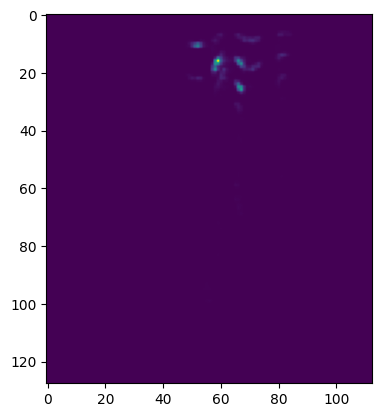

In [6]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.imshow(mel)

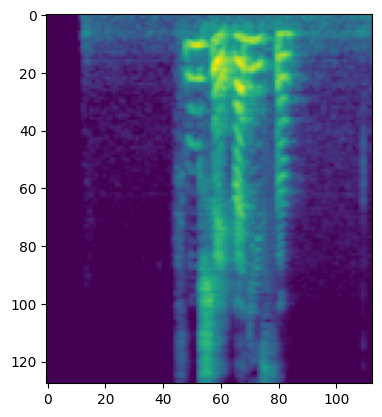

In [36]:
mel_db = librosa.power_to_db(mel, ref = np.max)

import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.imshow(mel_db)
plt.savefig('test.png')

In [9]:
file_path

'train/c539d24c9e9217f096fafa7e965a2130.wav'

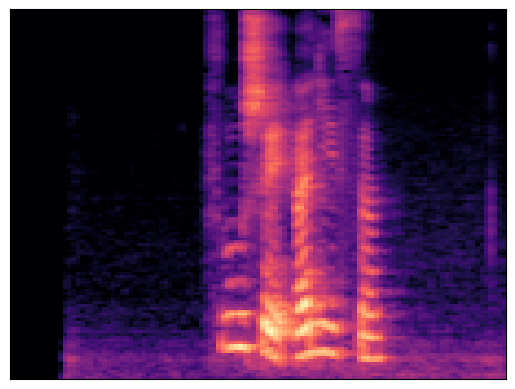

In [41]:
# fig, ax = plt.subplots()

# librosa.display.specshow(mel_db, x_axis='time', y_axis='mel')
librosa.display.specshow(mel_db)

plt.savefig('test.jpg')


def save_mel(file_path, file_output):
    y, sr = soundfile.read(io.BytesIO(file_path.read_bytes()))
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref = np.max)
    
    
